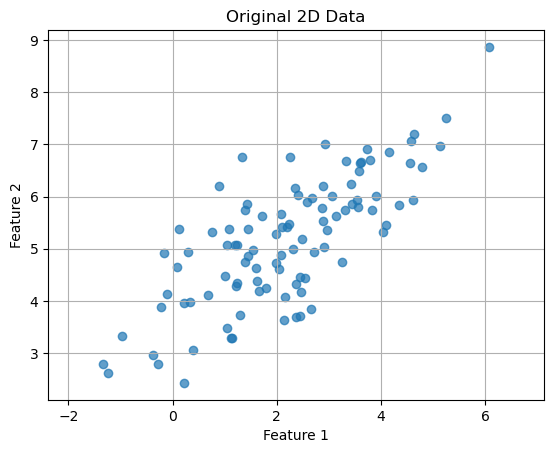

Centered Data (first 5 samples):
[[-0.96052321 -0.89468793]
 [-1.89165135 -0.22607541]
 [ 0.308911    0.01591591]
 [-3.15190687 -1.84481145]
 [ 0.38855616  0.73058645]]

Covariance Matrix:
[[2.28165958 1.40082016]
 [1.40082016 1.50064765]]

Eigenvalues:
[0.43692116 3.34538606]

Eigenvectors:
[[ 0.60476002 -0.79640776]
 [-0.79640776 -0.60476002]]


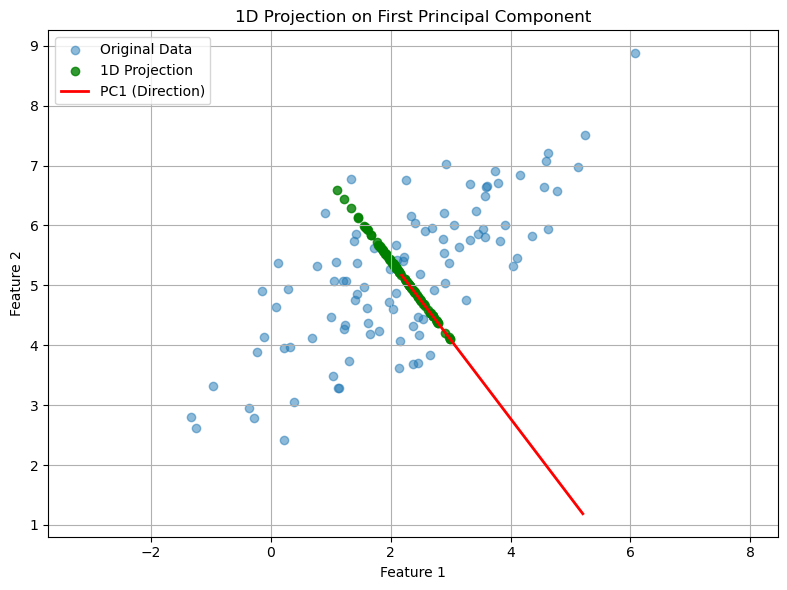

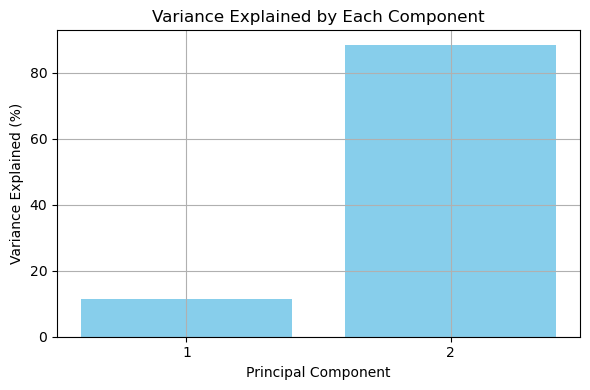

In [8]:
#Q.1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

# Step 3: Center the data
X_centered = X - np.mean(X, axis=0)
print("Centered Data (first 5 samples):")
print(X_centered[:5])  # printing only first 5 rows for brevity

# Step 4: Compute covariance matrix
cov_matrix = np.cov(X_centered.T)
print("\nCovariance Matrix:")
print(cov_matrix)

# Step 5: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Step 6: Project and visualize in 2D
pc1 = eigenvectors[:, 0]
projected_1d = X_centered @ pc1
X_projected_2d = np.outer(projected_1d, pc1) + np.mean(X, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.scatter(X_projected_2d[:, 0], X_projected_2d[:, 1], alpha=0.8, color='green', label='1D Projection')
plt.plot(
    [np.mean(X, axis=0)[0], np.mean(X, axis=0)[0] + pc1[0] * 5],
    [np.mean(X, axis=0)[1], np.mean(X, axis=0)[1] + pc1[1] * 5],
    color='red', linewidth=2, label='PC1 (Direction)'
)
plt.title("1D Projection on First Principal Component")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Variance Explained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(6, 4))
plt.bar([1, 2], explained_variance_ratio * 100, color='skyblue')
plt.xticks([1, 2])
plt.ylabel("Variance Explained (%)")
plt.xlabel("Principal Component")
plt.title("Variance Explained by Each Component")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Q.2
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import seaborn as sns

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

print(f"Shape of X: {X.shape}")  # (1797, 64)
print(f"Shape of Y: {y.shape}")
# Function to plot t-SNE with different perplexity
def plot_tsne(perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, ticks=range(10))
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.grid(True)
    plt.show()

# Try different perplexity values
for p in [5, 30, 50]:
    plot_tsne(p)


Shape of X: (1797, 64)
Shape of Y: (1797,)
